In [4]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [5]:
Neoprot_data = pd.read_csv('Data/Tonian_Cryogenian_Composite_data.csv')
Phanerozoic_LOWESS = pd.read_excel('Data/LOWESS 5 Skeleton 09 04 13.xlsx')


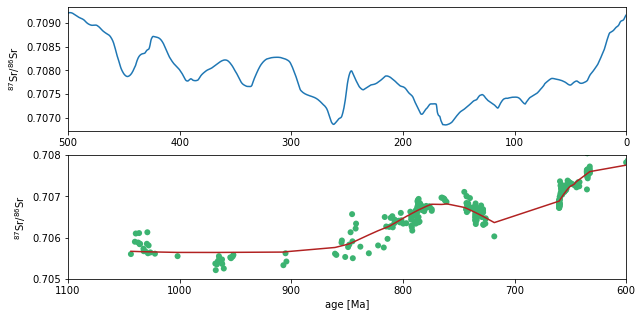

In [20]:

xy_87Sr86Sr = sm.nonparametric.lowess(Neoprot_data['87Sr/86Sr_primary'], Neoprot_data['age'], frac=0.25)

fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(Phanerozoic_LOWESS['Age'], Phanerozoic_LOWESS['Mean'])
ax[0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[0].set_xlim(500,0)

ax[1].scatter(Neoprot_data['age'], Neoprot_data['87Sr/86Sr_primary'], facecolor='mediumseagreen', edgecolor='none')
ax[1].plot(xy_87Sr86Sr[:,0], xy_87Sr86Sr[:,1], color='firebrick')
ax[1].set_xlim(1100,600)
ax[1].set_xlabel('age [Ma]')
ax[1].set_ylim(0.705,0.708)
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')
plt.show(fig)

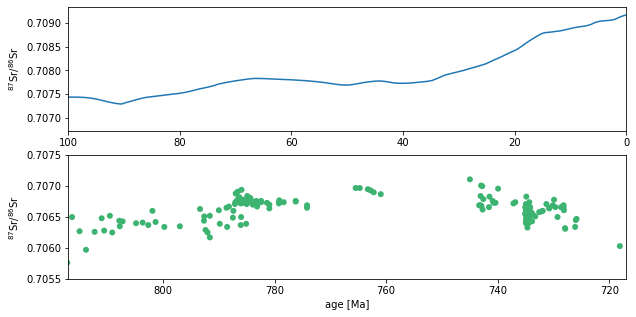

In [21]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(Phanerozoic_LOWESS['Age'], Phanerozoic_LOWESS['Mean'])
ax[0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[0].set_xlim(100,0)
ax[1].set_ylim(0.7070,0.7090)
ax[1].scatter(Neoprot_data['age'], Neoprot_data['87Sr/86Sr_primary'], facecolor='mediumseagreen', edgecolor='none')
#ax[1].plot(xy_87Sr86Sr[:,0], xy_87Sr86Sr[:,1], color='firebrick')
ax[1].set_xlim(817,717)
ax[1].set_xlabel('age [Ma]')
ax[1].set_ylim(0.7055,0.7075)
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')
plt.show(fig)

In [65]:
pre_Sturt_data = Neoprot_data[Neoprot_data['age']>717]
pre_Sturt_post800_data = pre_Sturt_data[pre_Sturt_data['age']<800]
pre_Sturt_lowess = sm.nonparametric.lowess(pre_Sturt_post800_data['87Sr/86Sr_primary'], pre_Sturt_post800_data['age'], frac=0.6)

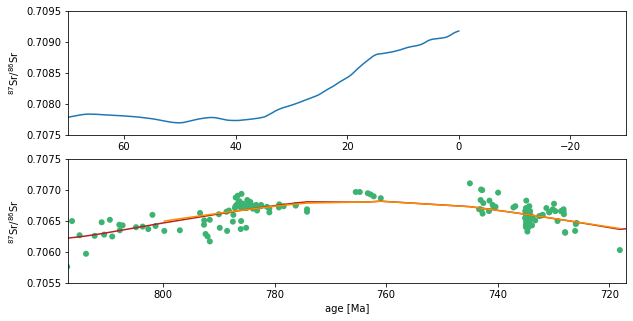

In [66]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(Phanerozoic_LOWESS['Age'], Phanerozoic_LOWESS['Mean'])
ax[0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[0].set_xlim(70,-30)
ax[0].set_ylim(0.7075,0.7095)
ax[1].scatter(Neoprot_data['age'], Neoprot_data['87Sr/86Sr_primary'], facecolor='mediumseagreen', edgecolor='none')
ax[1].plot(xy_87Sr86Sr[:,0], xy_87Sr86Sr[:,1], color='firebrick')
ax[1].plot(pre_Sturt_lowess[:,0], pre_Sturt_lowess[:,1], color='darkorange')
ax[1].set_xlim(817,717)
ax[1].set_xlabel('age [Ma]')
ax[1].set_ylim(0.7055,0.7075)
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')
plt.show(fig)

In [67]:
Phanerozoic_LOWESS_35Ma = Phanerozoic_LOWESS[Phanerozoic_LOWESS['Age']<35]
x_detrended = signal.detrend(Phanerozoic_LOWESS_35Ma['Mean'])

pre_Sturt_lowess_detrended = signal.detrend(pre_Sturt_lowess[:,1])

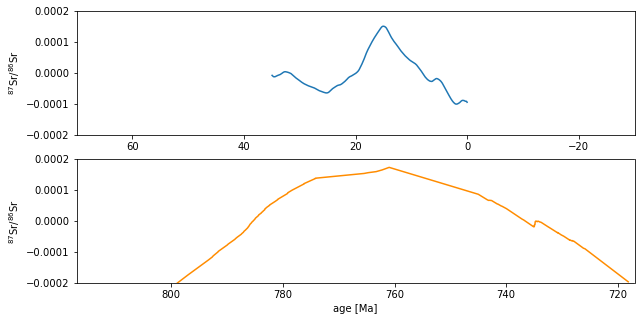

In [68]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(Phanerozoic_LOWESS_35Ma['Age'], x_detrended.tolist())
ax[0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[0].set_xlim(70,-30)
ax[0].set_ylim(-.0002,.0002)
ax[1].plot(pre_Sturt_lowess[:,0], pre_Sturt_lowess_detrended, color='darkorange')
ax[1].set_xlim(817,717)
ax[1].set_xlabel('age [Ma]')
ax[1].set_ylim(-.0002,.0002)
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')
plt.show(fig)